In [1]:
import os
import logging

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

from utils.config import Config

In [2]:
config = Config()

2025-07-26 21:35:27,127 - INFO - Current device: mps


## Binary Classification dataset

- *Generamos nuestro dataset de prueba utilizando la función `sklearn.datasets.make_circles()`. Agregamos un poco de ruído Gaussiano (`noise=0.03`) para que ambas clases se encuentren bien separadas una de la otra, lo que facilita la tarea de clasificación.*

In [3]:
# Number of samples
n = 2000

# Generate data
X, y = make_circles(n_samples=n, noise=0.03, random_state=42)

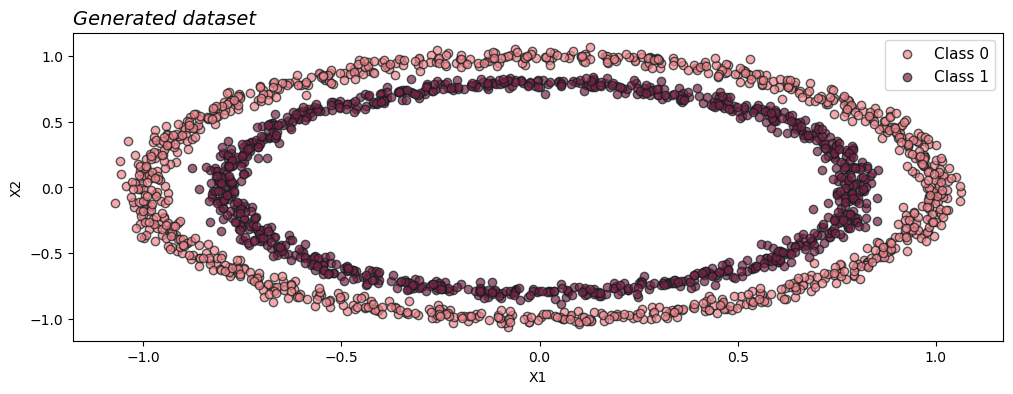

In [4]:
# Plot data
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='#f2858e', edgecolor='#0b1e1a', alpha=0.7, label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='#7a2246', edgecolor='#0b1e1a', alpha=0.7, label='Class 1')
ax.set_title('Generated dataset', loc='left', fontdict=dict(size=14, fontstyle='italic'))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(prop={'size': 11})
plt.show()

- *Antes de convertir nuestros datos en tensores, vamos a separarlos en una partición de entrenamiento (70% de los datos), una partición de validación (15% de los datos) que vamos a usar durante el entrenamiento (nos permite entender si el modelo está aprendiendo algo) y una partición de evaluación (15% de los datos) para validar el rendimiento de nuestro modelo una vez entrenado. Vamos a utilizar la función `sklearn.model_selection.train_test_split()` que nos permite separar aleatoriamente nuestro dataset.*
- *La función `sklearn.model_selection.train_test_split()` nos devuelve nuestros datos en arrays de Numpy. Para convertir los datos en tensores vamos a utilizar la función `torch.from_numpy()`.*
- *Es importante definir el tipo de dato que queremos utilizar (`torch.float32` suele ser el adecuado) y el dispositivo en donde queremos guardarlo.*

In [5]:
# Randomly split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the test set into evaluation and validation partition (e.g., 50% each)
X_eval, X_val, y_eval, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [6]:
# Convert the data to PyTorch tensors
# We also use the `torch.Tensor.to()` method to move the tensors to the available device and set the data type to torch.float32
X_train, y_train = torch.from_numpy(X_train).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_train).to(dtype=torch.float32, device=config.device)
X_eval, y_eval = torch.from_numpy(X_eval).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_eval).to(dtype=torch.float32, device=config.device)
X_val, y_val = torch.from_numpy(X_val).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_val).to(dtype=torch.float32, device=config.device)

- *Concatenamos las features y las etiquetas en un solo tensor, para cada partición. Vamos a utilizar la función `torch.save()`.*

In [7]:
# Concatenate the features and labels along the second dimension (dim=1) to create a tensor of shape (n, 3)
train_data = torch.cat((X_train, y_train.unsqueeze(1)), dim=1)
validation_data = torch.cat((X_val, y_val.unsqueeze(1)), dim=1)
evaluation_data = torch.cat((X_eval, y_eval.unsqueeze(1)), dim=1)

# Create a directory to save the data if it doesn't exist
try:
    os.makedirs('temp/data/binary-classification')
    logging.info('Created directory: temp/data/binary-classification')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/binary-classification/train_data.pth')
    torch.save(validation_data, 'temp/data/binary-classification/validation_data.pth')
    torch.save(evaluation_data, 'temp/data/binary-classification/evaluation_data.pth')
    
    logging.info('💾 Data saved successfully in temp/data/binary-classification directory.')
except FileExistsError:
    logging.info('Directory already exists: temp/data/binary-classification')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/binary-classification/train_data.pth')
    torch.save(validation_data, 'temp/data/binary-classification/validation_data.pth')
    torch.save(evaluation_data, 'temp/data/binary-classification/evaluation_data.pth')

    logging.info('💾 Data saved successfully in temp/data/binary-classification directory.')

2025-07-26 21:35:27,409 - INFO - Directory already exists: temp/data/binary-classification
2025-07-26 21:35:27,414 - INFO - 💾 Data saved successfully in temp/data/binary-classification directory.


## Multiclass Classification dataset

- *Generamos nuestro dataset de prueba con la función `sklearn.datasets.make_blobs()`. Esta función es similar a la utilizamos para el problema de clasificación binaria, con la diferencia de que genera clusters.*

In [8]:
X, y = make_blobs(n_samples=2000, centers=4, n_features=2, cluster_std=1.5, random_state=42)

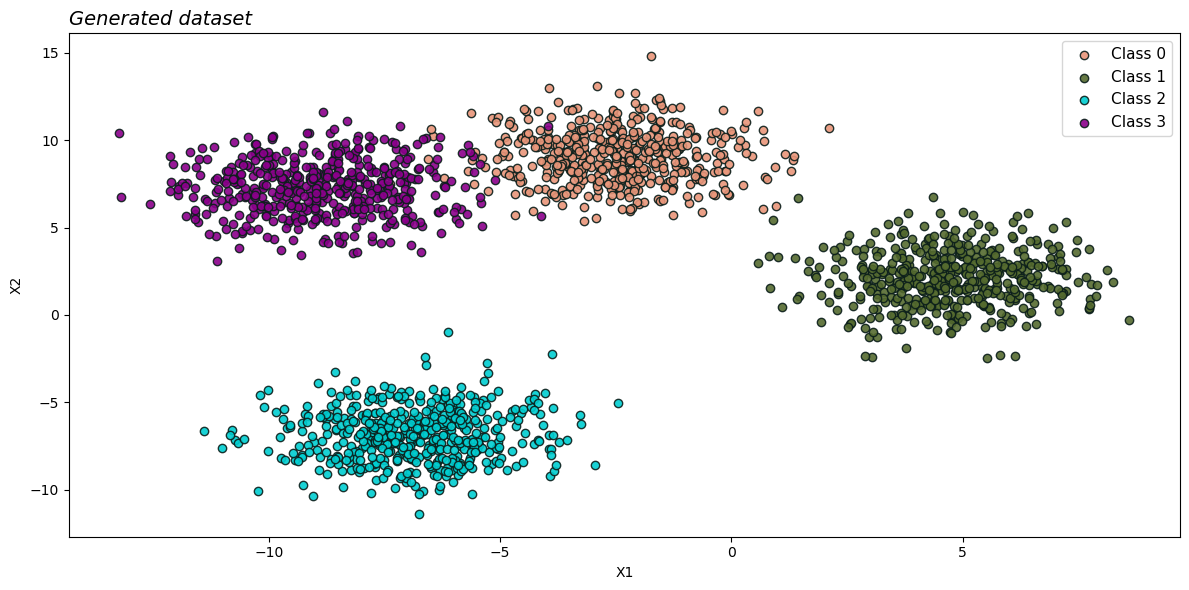

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='darksalmon', edgecolor='#0b1e1a', alpha=0.9, label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='darkolivegreen', edgecolor='#0b1e1a', alpha=0.9, label='Class 1')
ax.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='darkturquoise', edgecolor='#0b1e1a', alpha=0.9, label='Class 2')
ax.scatter(X[y == 3][:, 0], X[y == 3][:, 1], color='darkmagenta', edgecolor='#0b1e1a', alpha=0.9, label='Class 3')
ax.set_title('Generated dataset', loc='left', fontdict=dict(size=14, fontstyle='italic'))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(prop={'size': 11})

plt.tight_layout()
plt.show()

- *Una vez generados los datos los vamos a dividir en una partición de entrenamiento (70% de los datos), de validación (15%) y de evaluación (15%). Al igual que antes vamos a utilizar la función `sklearn.model_selection.train_test_split()` para separar aleatoriamente los datos.*
- *Convertimos los arrays de Numpy a tensores. Nos aseguramos que tenga el tipo de dato deseado y que estén en el dispositivo correcto.*

In [10]:
# Randomly split the data into training and testing sets
# We then split the test set into evaluation and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_eval, X_val, y_eval, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [11]:
# Convert the data to PyTorch tensors. We make sure the tensors are on the correct device and have the right data type.
X_train, y_train = torch.from_numpy(X_train).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_train).to(dtype=torch.float32, device=config.device)
X_eval, y_eval = torch.from_numpy(X_eval).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_eval).to(dtype=torch.float32, device=config.device)
X_val, y_val = torch.from_numpy(X_val).to(dtype=torch.float32, device=config.device), torch.from_numpy(y_val).to(dtype=torch.float32, device=config.device)

- *Concatenamos las features y las etiquetas en un solo tensor, para cada partición, para poder guardarlos.*

In [12]:
# Concatenate the features and labels along the second dimension (dim=1) to create a tensor of shape (n, 3)
train_data = torch.cat((X_train, y_train.unsqueeze(1)), dim=1)
validation_data = torch.cat((X_val, y_val.unsqueeze(1)), dim=1)
evaluation_data = torch.cat((X_eval, y_eval.unsqueeze(1)), dim=1)

# Create a directory to save the data if it doesn't exist
try:
    os.makedirs('temp/data/multiclass-classification')
    logging.info('Created directory: temp/data/multiclass-classification')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/multiclass-classification/train_data.pth')
    torch.save(validation_data, 'temp/data/multiclass-classification/validation_data.pth')
    torch.save(evaluation_data, 'temp/data/multiclass-classification/evaluation_data.pth')
    
    logging.info('💾 Data saved successfully in temp/data/multiclass-classification directory.')
except FileExistsError:
    logging.info('Directory already exists: temp/data/multiclass-classification')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/multiclass-classification/train_data.pth')
    torch.save(validation_data, 'temp/data/multiclass-classification/validation_data.pth')
    torch.save(evaluation_data, 'temp/data/multiclass-classification/evaluation_data.pth')

    logging.info('💾 Data saved successfully in temp/data/binary-classification directory.')

2025-07-26 21:35:27,601 - INFO - Directory already exists: temp/data/multiclass-classification
2025-07-26 21:35:27,605 - INFO - 💾 Data saved successfully in temp/data/binary-classification directory.
